# Title: Predicting Osteoporosis Riskabs


## STEP 1 — Project Setup & Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner visuals
sns.set(style="whitegrid")


In [3]:
df = pd.read_csv('osteoporosis.csv')
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,104866,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,101999,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,106567,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,102316,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,101944,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [4]:
df.shape
df.info()
df.describe()
df.isnull().sum()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

## STEP 2 — Handling Missing Values

In [5]:
# Columns that have missing values
missing_cols = ['Alcohol Consumption', 'Medical Conditions', 'Medications']

# Fill with "Unknown" category
for col in missing_cols:
    df[col] = df[col].fillna('Unknown')

In [6]:
df.isnull().sum()

Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [7]:
df['Osteoporosis'].value_counts()


Osteoporosis
1    979
0    979
Name: count, dtype: int64

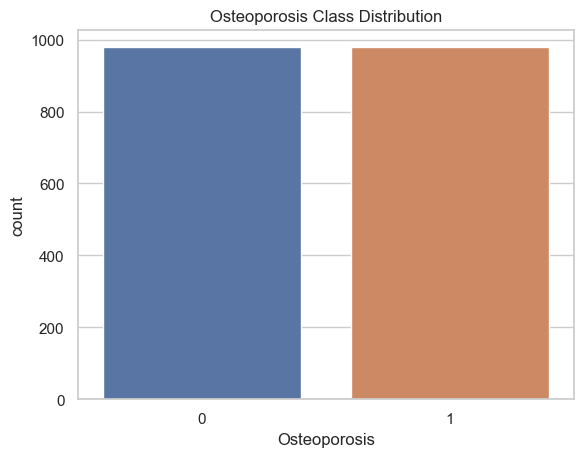

In [8]:
sns.countplot(data=df, x='Osteoporosis')
plt.title("Osteoporosis Class Distribution")
plt.show()


## STEP 3 — Exploratory Data Analysis (EDA)

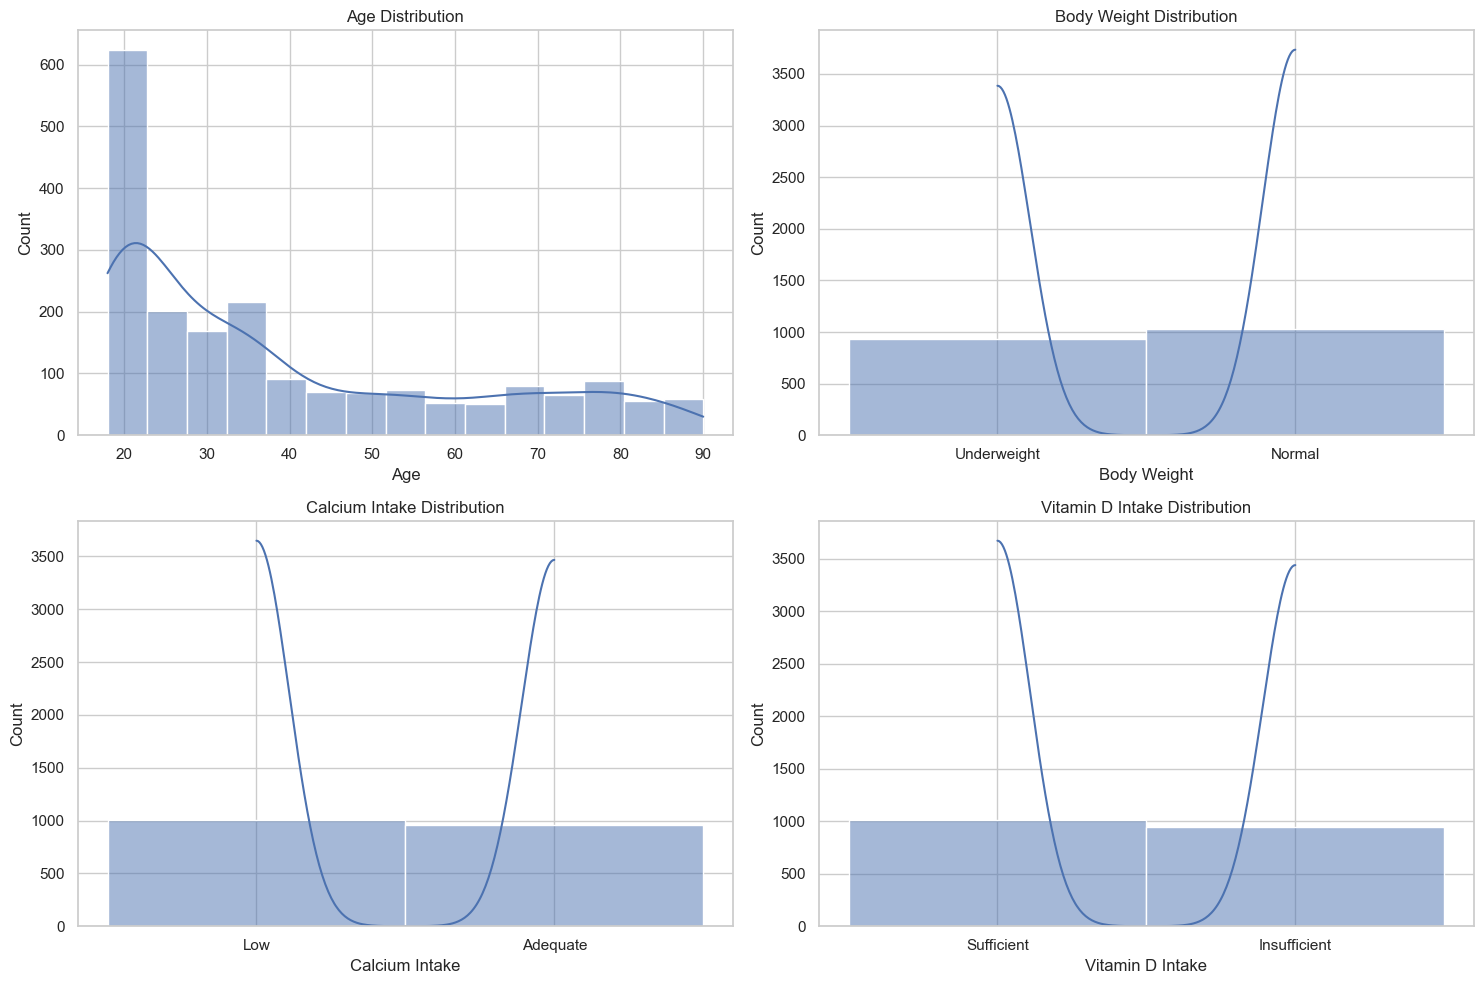

In [9]:
num_cols = ['Age', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


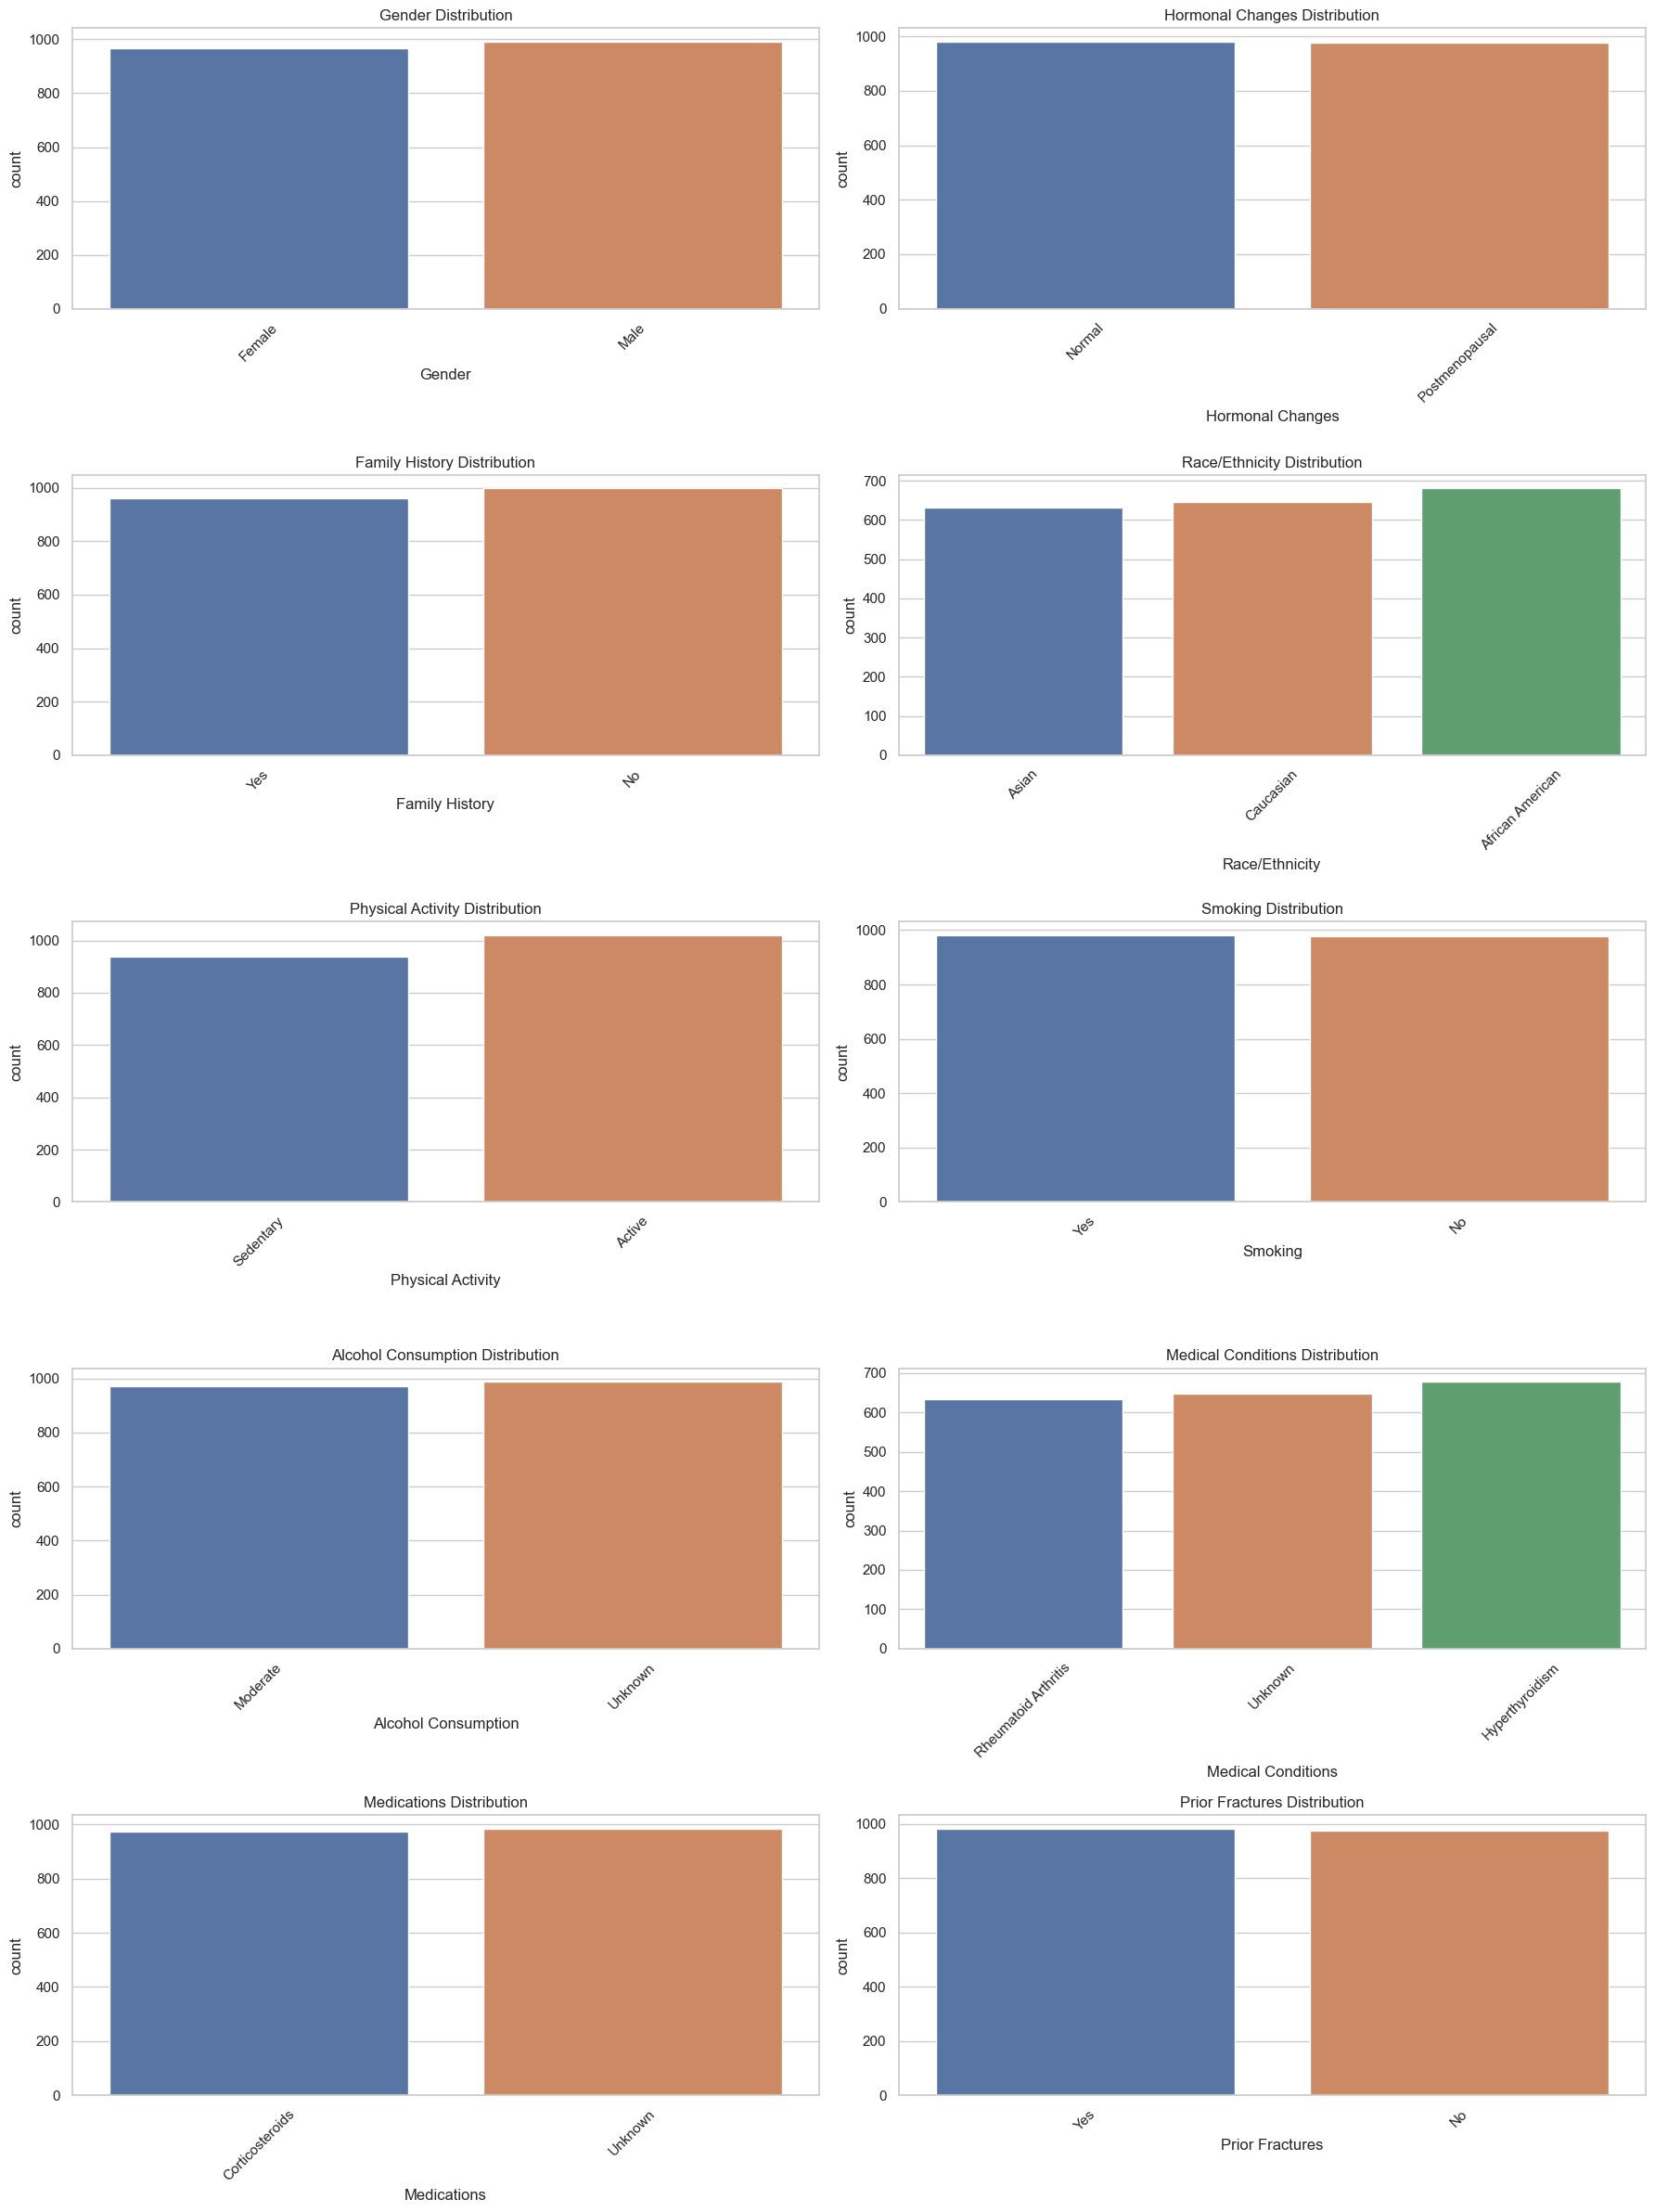

In [10]:
cat_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
            'Physical Activity', 'Smoking', 'Alcohol Consumption',
            'Medical Conditions', 'Medications', 'Prior Fractures']

plt.figure(figsize=(18,24))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


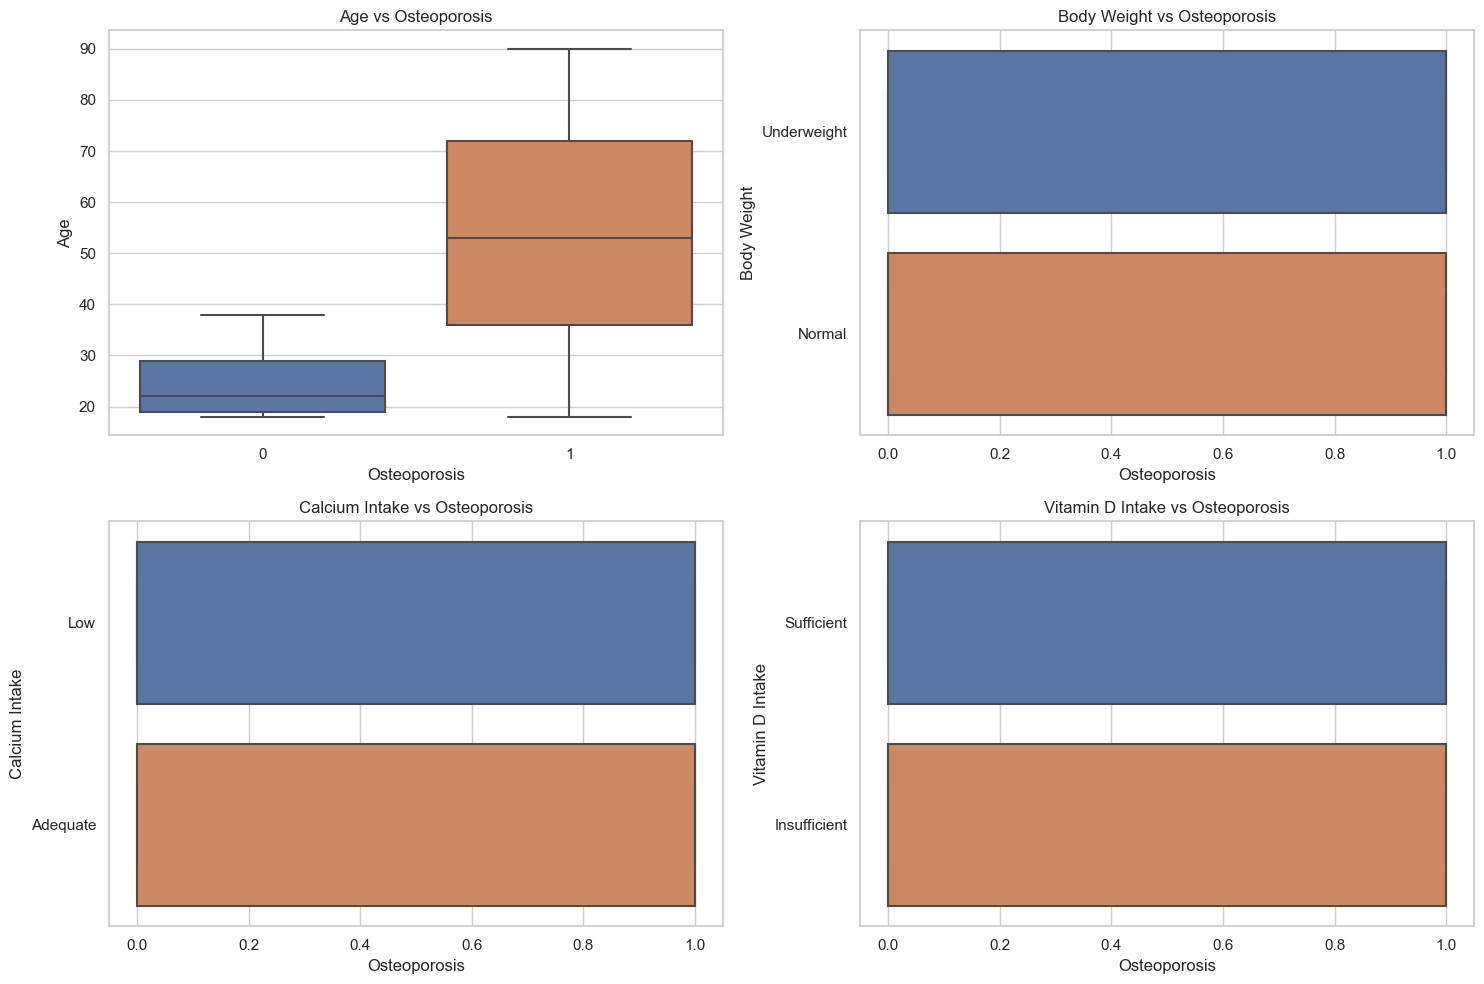

In [11]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Osteoporosis', y=col)
    plt.title(f"{col} vs Osteoporosis")
plt.tight_layout()
plt.show()


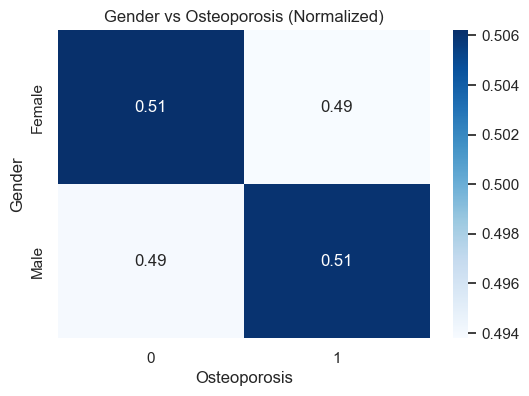

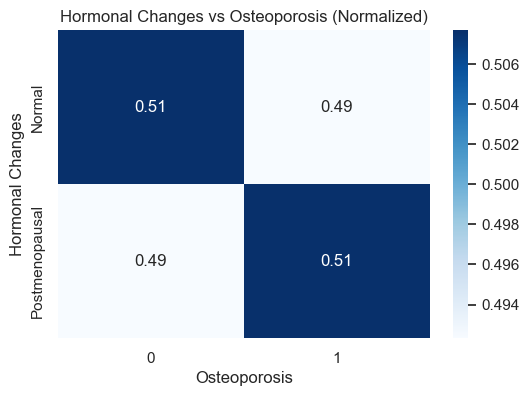

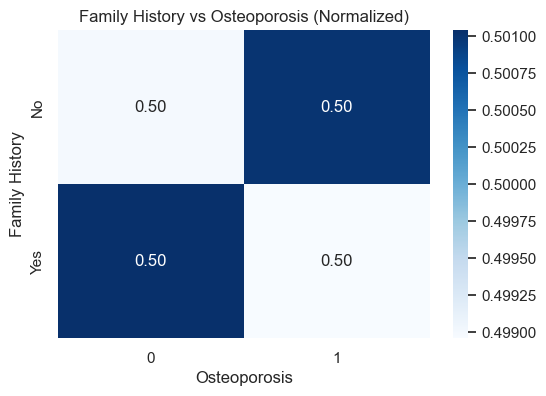

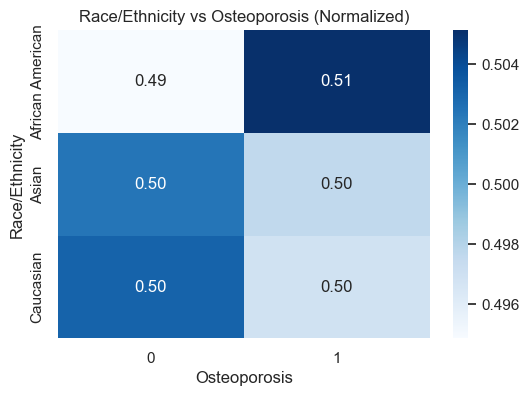

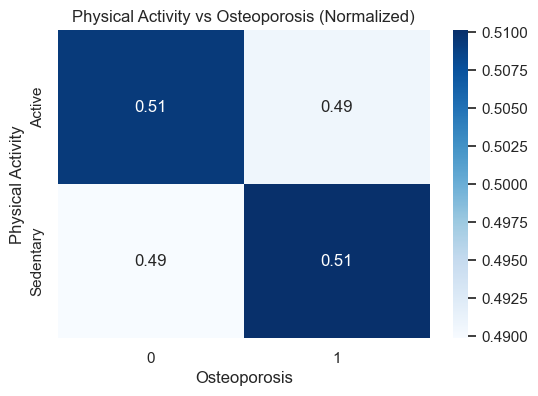

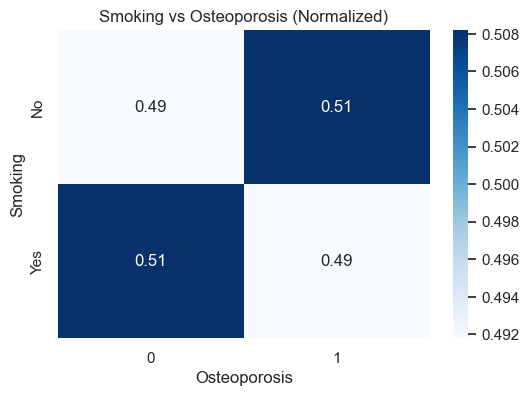

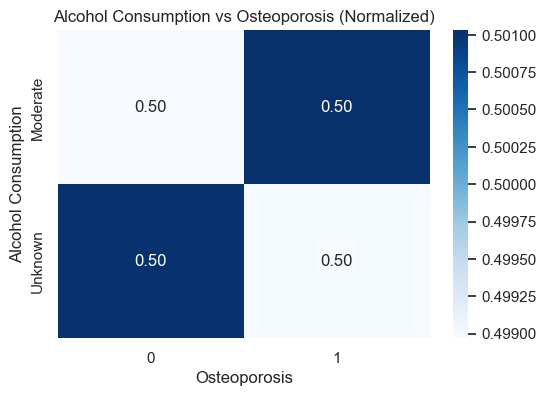

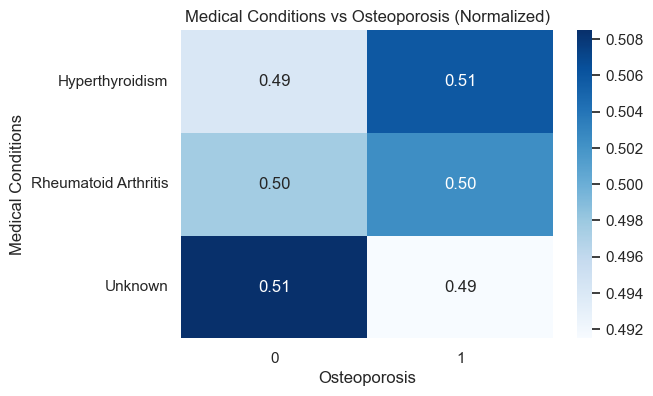

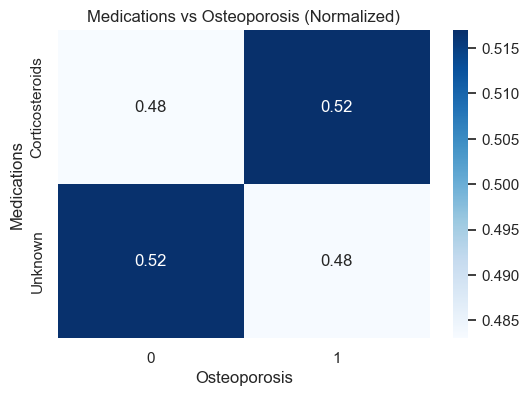

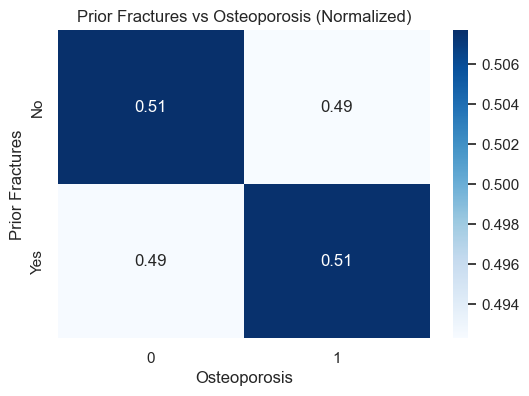

In [12]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    ct = pd.crosstab(df[col], df['Osteoporosis'], normalize='index')
    sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"{col} vs Osteoporosis (Normalized)")
    plt.show()


## STEP 4 — Data Preprocessing & Feature Engineering

In [15]:
# Target variable
target = 'Osteoporosis'

# Numeric features
num_cols = ['Age', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake']

# Categorical features
cat_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
            'Physical Activity', 'Smoking', 'Alcohol Consumption',
            'Medical Conditions', 'Medications', 'Prior Fractures']


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [17]:
# One-Hot Encoding for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Standard Scaling for numeric features
numeric_transformer = StandardScaler()

# Combine both in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])


In [18]:
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 30, 45, 60, 75, 100],
                         labels=['<30', '30-45', '45-60', '60-75', '75+'])


In [20]:
cat_cols.append('Age_Group')


In [21]:
df['Nutrient_Score'] = df['Calcium Intake'] + df['Vitamin D Intake']
num_cols.append('Nutrient_Score')


## STEP 5 — Model Building

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


### A) Logistic Regression Pipeline

In [23]:
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


### B) Decision Tree Pipeline

In [24]:
pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])


### C) Random Forest Pipeline

In [25]:
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


### D) Support Vector Classifier (SVC) Pipeline

In [26]:
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True, random_state=42))
])


### Evaluate Models

In [35]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


In [36]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [40]:
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC())
])



In [45]:
# ---------------------------------------------
# 1. Identify actual columns in X_train
# ---------------------------------------------
print("Columns in X_train:", X_train.columns.tolist())

# Automatically detect numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


# ---------------------------------------------
# 2. Build preprocessors correctly
# ---------------------------------------------
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# ---------------------------------------------
# 3. Build pipelines again
# ---------------------------------------------
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', LogisticRegression())])

pipe_dt = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', DecisionTreeClassifier())])

pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', RandomForestClassifier())])

pipe_svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', SVC())])


# ---------------------------------------------
# 4. Fit pipelines
# ---------------------------------------------
pipe_lr.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_svc.fit(X_train, y_train)


# ---------------------------------------------
# 5. Evaluate models
# ---------------------------------------------
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results = {
    'Logistic Regression': evaluate_model(pipe_lr, X_test, y_test),
    'Decision Tree': evaluate_model(pipe_dt, X_test, y_test),
    'Random Forest': evaluate_model(pipe_rf, X_test, y_test),
    'SVC': evaluate_model(pipe_svc, X_test, y_test)
}

results


Columns in X_train: ['Id', 'Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']
Numeric features: ['Id', 'Age']
Categorical features: ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 'Prior Fractures']


{'Logistic Regression': {'Accuracy': 0.8061224489795918,
  'Precision': 0.8571428571428571,
  'Recall': 0.7346938775510204,
  'F1 Score': 0.7912087912087912},
 'Decision Tree': {'Accuracy': 0.8290816326530612,
  'Precision': 0.8412698412698413,
  'Recall': 0.8112244897959183,
  'F1 Score': 0.825974025974026},
 'Random Forest': {'Accuracy': 0.826530612244898,
  'Precision': 0.9266666666666666,
  'Recall': 0.7091836734693877,
  'F1 Score': 0.8034682080924855},
 'SVC': {'Accuracy': 0.8061224489795918,
  'Precision': 0.9054054054054054,
  'Recall': 0.6836734693877551,
  'F1 Score': 0.7790697674418605}}

### Classification Reports

In [46]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_test, pipe_rf.predict(X_test)))

print("SVC Classification Report:")
print(classification_report(y_test, pipe_svc.predict(X_test)))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       196
           1       0.93      0.71      0.80       196

    accuracy                           0.83       392
   macro avg       0.85      0.83      0.82       392
weighted avg       0.85      0.83      0.82       392

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       196
           1       0.91      0.68      0.78       196

    accuracy                           0.81       392
   macro avg       0.83      0.81      0.80       392
weighted avg       0.83      0.81      0.80       392



## STEP 6 — Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV


### A) Logistic Regression Parameters

In [48]:
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

In [52]:
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)


In [58]:
grid_lr.best_params_, grid_lr.best_score_


({'model__C': 0.01, 'model__penalty': 'l2', 'model__solver': 'lbfgs'},
 0.835421346478932)

### B) Decision Tree Parameters

In [49]:
param_grid_dt = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}


In [53]:
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)


In [59]:
grid_dt.best_params_, grid_dt.best_score_


({'model__criterion': 'gini',
  'model__max_depth': 5,
  'model__min_samples_leaf': 4,
  'model__min_samples_split': 2},
 0.9010454008298329)

### C) Random Forest Parameters

In [50]:
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}


In [54]:
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)


In [60]:
grid_rf.best_params_, grid_rf.best_score_


({'model__bootstrap': False,
  'model__max_depth': 10,
  'model__min_samples_leaf': 4,
  'model__min_samples_split': 5,
  'model__n_estimators': 200},
 0.8484286433313903)

### D) SVC Parameters

In [69]:
param_grid_svc = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVC(probability=True))
])


In [55]:
grid_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=5, scoring='f1', n_jobs=-1)


In [61]:
grid_svc.best_params_, grid_svc.best_score_


({'model__C': 1, 'model__gamma': 'auto', 'model__kernel': 'rbf'},
 0.8315766772250683)

### Fit All GridSearch Models

In [56]:
grid_lr.fit(X_train, y_train)
grid_dt.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)
grid_svc.fit(X_train, y_train)


,estimator,"Pipeline(step...del', SVC())])"
,param_grid,"{'model__C': [0.1, 1, ...], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear', 'rbf']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


### Evaluate Tuned Models on Test Set

In [62]:
best_models = {
    "Logistic Regression": grid_lr.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": grid_rf.best_estimator_,
    "SVC": grid_svc.best_estimator_
}


In [63]:
tuned_results = {}

for name, model in best_models.items():
    tuned_results[name] = evaluate_model(model, X_test, y_test)

pd.DataFrame(tuned_results).T


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.836735,0.958333,0.704082,0.811765
Decision Tree,0.877551,1.000000,0.755102,0.860465
Random Forest,0.834184,0.951724,0.704082,0.809384
SVC,0.823980,0.926174,0.704082,0.800000


## STEP 7 — Final Model Evaluation & Interpretation

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


<Figure size 400x400 with 0 Axes>

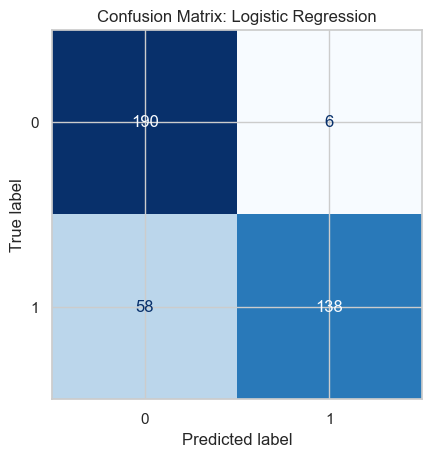

<Figure size 400x400 with 0 Axes>

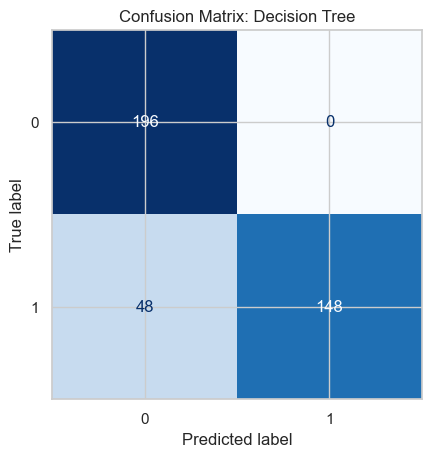

<Figure size 400x400 with 0 Axes>

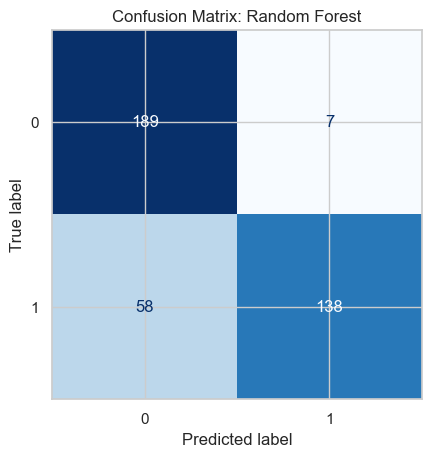

<Figure size 400x400 with 0 Axes>

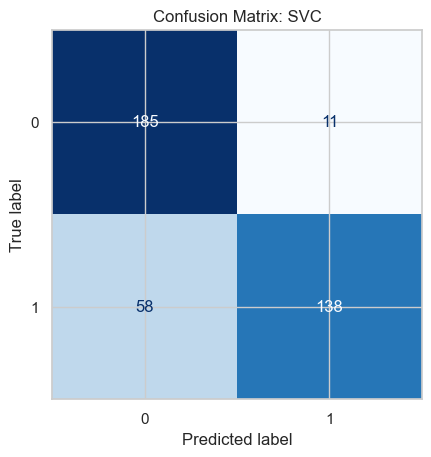

In [67]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    plt.figure(figsize=(4,4))
    disp.plot(cmap='Blues', colorbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.show()


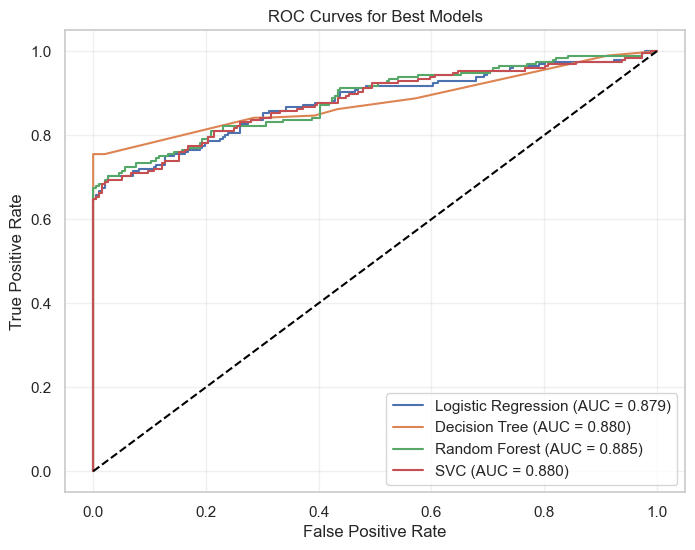

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # Some models do not have predict_proba (e.g., SVC without probability=True)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        # Scale decision function to probability-like values
        y_prob = model.decision_function(X_test)
    else:
        print(f"Skipping {name}: No probability or decision function available.")
        continue
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Best Models")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
